

*   *Develop a Face Recognition System Using
FaceNet for your classmate*
* **[3 pt]**   Collect a dataset for you and your classmate to do your system

* **[2 pt]** Do a Face_Verification function that verifies that the two images for the same person
  * The function Input is the path of two images.
  * It checks whether both images belong to the same person.
  * It returns "same Person" or "not same person" and the distance between them
  * recognition = Face_Verification("./image1.jpg",  "./image2.jpg")
* **[5 pt]**  Do a **Face_Recognition** A function that clusters an Image to a specific folder in a labeled database
  * The function Input is the image and folder path.
  * It returns a dictionary of the nearest label folders to the input image and its distance.
  * recognition = Face_Recognition("./test_image.jpg",  "./labeld_database")

---
**you may use these steps**

* Read an image and Detect the face
*  perform alignment
* Extract face embeddings
* Calculate the distance between embeddings present in the database and extracted input face embeddings
*  Find the index of the lowest distance, and check if the distance is less than a threshold
  * If yes then use the index to find the person from the database
  * Else the person in the input image is not present in the database
*  Use the OpenCV utilities to tag the person in the image
* cluster faces using SVM
* visualize each step
----
#Bounce
#Bounce#1 **[2pt]**
# Search for a FaceNet model that can be loaded using the load_model function

#Bounce#2:**[2pt]** Solve The errors
  * Adapt train_generator
  * fit the model on the train_generator



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-facenet
#Detect Faces
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import math
import cv2




In [ ]:
%cd /content/drive/MyDrive/my_photoes_siamese


/content/drive/MyDrive/my_photoes_siamese


In [ ]:
%ls

 48B3B9C5-9F19-4B88-AD32-7E5E27D060BA.jpeg
 C327787E-16EC-4DCC-91D7-E1C808A7BA65.JPG
'Copy of Copy of IMG_9426.JPG'
'Copy of DSC_0244.JPG'
'Copy of IMG_2895.JPG'
'Copy of IMG_3557.jpg'
'Copy of IMG_6300.jpg'
 EF737F7C-1B7F-4A6C-A6D5-6584C4A52EC2.jpeg
 IMG_6300.jpg
'Screenshot 2022-10-23 183836.png'


In [ ]:
import mtcnn


In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
from os import listdir
from os.path import join
import os
embedder = FaceNet()


facenet_model=embedder.model

## Load image and detect face

In [ ]:
# load image from file
image = Image.open('Copy of IMG_6300.jpg')
# convert to RGB, if needed
# image = image.convert('RGB')
# convert to array
image = asarray(image)

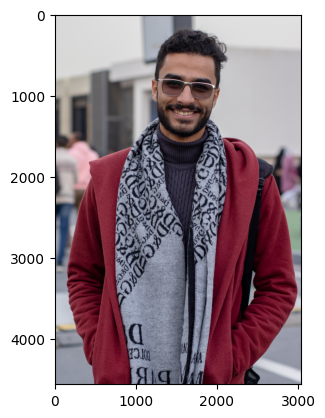

(4560, 3040, 3)

In [ ]:
plt.imshow(image)
plt.show()
image.shape

In [ ]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image)

1/1 [==============================] - 1s 605ms/step


In [ ]:
results

[{'box': [1255, 533, 721, 922],
  'confidence': 1.0,
  'keypoints': {'left_eye': (1461, 844),
   'right_eye': (1815, 886),
   'nose': (1627, 1087),
   'mouth_left': (1425, 1179),
   'mouth_right': (1765, 1224)}}]

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

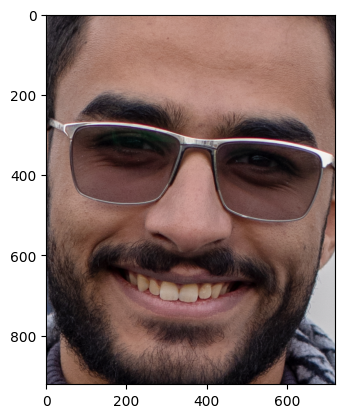

(922, 721, 3)


In [ ]:
# extract the face
face = image[y1:y2, x1:x2]
plt.imshow(face)
plt.show()
print(face.shape)

### resize the image

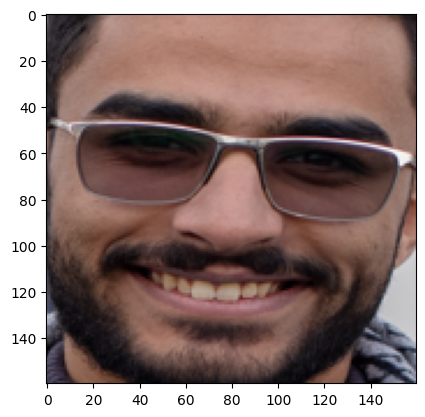

(160, 160, 3)


In [ ]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = asarray(image)
plt.imshow(face_array)
plt.show()
print(face_array.shape)

## Face verification through computed distances

In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
def Face_Recognition(fimg, simg):

  # load image from file
  image = Image.open(fimg)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  plt.imshow(image)
  plt.show()
  # load image from file
  image = Image.open(simg)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  plt.imshow(image)
  plt.show()
  detect_ii = embedder.extract(ii, threshold=0.95)
  detect_jj = embedder.extract(jj, threshold=0.95)
  r = embedder.compute_distance(detect_ii[0]['embedding'], detect_jj[0]['embedding'])
  print("computed_distance: ",r)
  if r<.5:
    print('Same Person')
  else:
    print("not the same person")
  emd = get_embedding(facenet_model, face)
  print(" the embeding vector: ",emd)
  return r

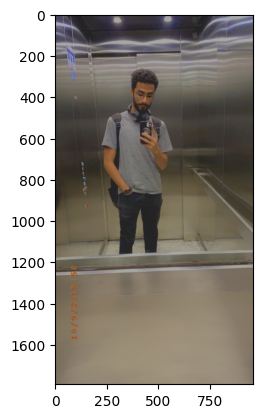

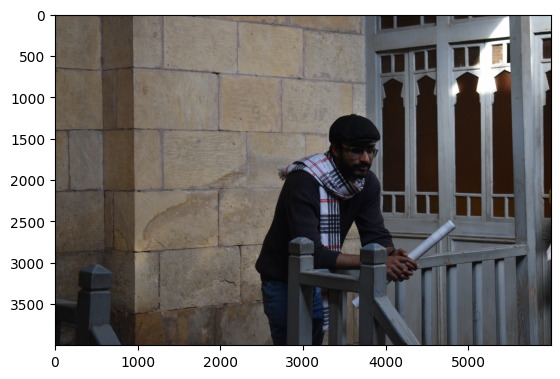

1/1 [==============================] - 0s 31ms/step
computed_distance:  0.41430938243865967
Same Person
1/1 [==============================] - 2s 2s/step
 the embeding vector:  [-2.76999106e-03 -5.80440722e-02 -5.34036942e-02  5.00112325e-02
  4.44233790e-02  5.31883910e-02  2.99281571e-02  1.01900455e-02
 -3.94405313e-02 -1.42090973e-02 -9.11491364e-02  6.99142665e-02
 -2.65492219e-02 -3.25226374e-02 -2.44063605e-02 -8.88225250e-03
 -1.63806304e-02  1.12580247e-02  4.20839936e-02 -7.46260881e-02
 -2.54061748e-03  8.48128553e-03  2.85026003e-02  4.97063622e-02
  5.48165254e-02  4.56773341e-02  4.00519073e-02 -5.40538467e-02
 -2.88350135e-02  2.80655604e-02  1.99939944e-02 -4.72091474e-02
 -1.44020487e-02 -1.06344968e-02 -2.93914005e-02  3.63388136e-02
  2.67361887e-02  2.55654790e-02 -9.90871489e-02  9.05859694e-02
  1.41831459e-02  3.25944498e-02 -9.01593734e-03  1.97779741e-02
 -2.07825098e-02  2.41012592e-02  7.45488005e-03  5.34044653e-02
 -7.59596378e-02 -2.94457916e-02  4.9935568

0.41430938243865967

In [ ]:
ii='/content/drive/MyDrive/my_photoes_siamese/48B3B9C5-9F19-4B88-AD32-7E5E27D060BA.jpeg'
jj='/content/drive/MyDrive/my_photoes_siamese/Copy of DSC_0244.JPG'

Face_Recognition(ii,jj)


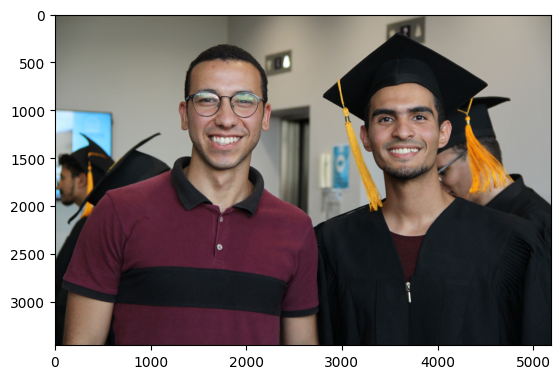

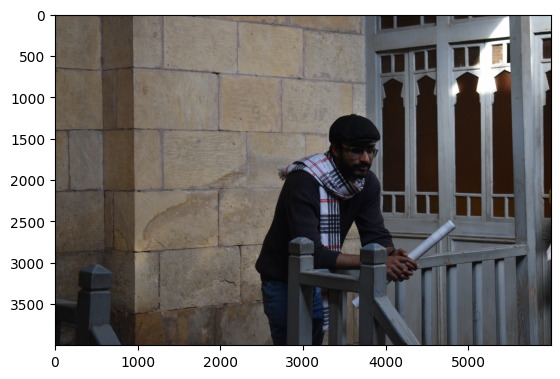

1/1 [==============================] - 0s 33ms/step
computed_distance:  0.7871025204658508
not the same person
1/1 [==============================] - 0s 33ms/step
 the embeding vector:  [-2.76999106e-03 -5.80440722e-02 -5.34036942e-02  5.00112325e-02
  4.44233790e-02  5.31883910e-02  2.99281571e-02  1.01900455e-02
 -3.94405313e-02 -1.42090973e-02 -9.11491364e-02  6.99142665e-02
 -2.65492219e-02 -3.25226374e-02 -2.44063605e-02 -8.88225250e-03
 -1.63806304e-02  1.12580247e-02  4.20839936e-02 -7.46260881e-02
 -2.54061748e-03  8.48128553e-03  2.85026003e-02  4.97063622e-02
  5.48165254e-02  4.56773341e-02  4.00519073e-02 -5.40538467e-02
 -2.88350135e-02  2.80655604e-02  1.99939944e-02 -4.72091474e-02
 -1.44020487e-02 -1.06344968e-02 -2.93914005e-02  3.63388136e-02
  2.67361887e-02  2.55654790e-02 -9.90871489e-02  9.05859694e-02
  1.41831459e-02  3.25944498e-02 -9.01593734e-03  1.97779741e-02
 -2.07825098e-02  2.41012592e-02  7.45488005e-03  5.34044653e-02
 -7.59596378e-02 -2.94457916e-02  

In [ ]:
ii='/content/drive/MyDrive/my_photoes_siamese/Copy of Copy of IMG_9426.JPG'
jj='/content/drive/MyDrive/my_photoes_siamese/Copy of DSC_0244.JPG'
print(Face_Recognition(ii,jj))

In [ ]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

## Loading dataset for face recognition

In [ ]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/img_dataset/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('./content/drive/MyDrive/valid_siam/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)


loaded 0 sample for class: Tony_Blair
1/1 [==============================] - 1s 695ms/step
loaded 10 sample for class: George_W_Bush
loaded 0 sample for class: Vladimir_Putin
1/1 [==============================] - 0s 122ms/step
loaded 10 sample for class: Donald_Rumsfeld
loaded 0 sample for class: AL-Limby
1/1 [==============================] - 0s 126ms/step
loaded 10 sample for class: Jacques_Chirac
1/1 [==============================] - 0s 148ms/step
loaded 10 sample for class: Ahmed Helmy
1/1 [==============================] - 0s 122ms/step
loaded 10 sample for class: Gerhard_Schroeder
1/1 [==============================] - 0s 128ms/step
loaded 10 sample for class: Hugo_Chavez
1/1 [==============================] - 0s 136ms/step
loaded 10 sample for class: Colin_Powell
(70, 160, 160, 3) (70,)
1/1 [==============================] - 0s 144ms/step
loaded 4 sample for class: Colin_Powell
(4, 160, 160, 3) (4,)


In [ ]:
# load the face dataset
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (70, 160, 160, 3) (70,) (4, 160, 160, 3) (4,)


In [ ]:
from keras_facenet import FaceNet

embedder = FaceNet()
# get the face embedding for one face
facenet_model=embedder.model

In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 32ms/step
(70, 512)
1/1 [==============================] - 0s 51ms/step
(4, 512)


## training and accuracy metric

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=70, test=4
Accuracy: train=100.000, test=100.000


Predicted: 
['Ahmed Helmy' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder'] 
[ 4.16799029 64.42338678  7.40317918  5.15128439  5.24131166  6.42592925
  7.18691845]
Expected: Colin_Powell


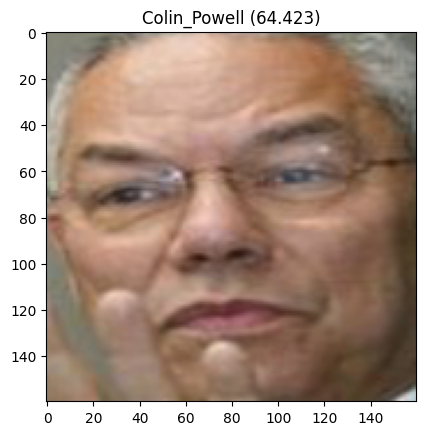

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()